## EDA1: TRAIN DATA



In [95]:
# importing data manipulation library
import pandas as pd
import numpy as np


In [96]:
data =pd.read_csv(r"C:\Users\User\Desktop\Messy-Food-Waste-Prediction\data\raw_data\train.csv")

In [97]:
data.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,28.946465
1,1,2023-11-21,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt,51.549053
2,4,2022-02-01,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt,53.008323
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt,48.621527
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT,44.156984


## Exploratory Data Analysis

In [98]:
# checking the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                911 non-null    int64  
 1   date              911 non-null    object 
 2   meals_served      911 non-null    int64  
 3   kitchen_staff     911 non-null    int64  
 4   temperature_C     911 non-null    float64
 5   humidity_percent  911 non-null    float64
 6   day_of_week       911 non-null    int64  
 7   special_event     911 non-null    int64  
 8   past_waste_kg     911 non-null    float64
 9   staff_experience  747 non-null    object 
 10  waste_category    911 non-null    object 
 11  food_waste_kg     911 non-null    float64
dtypes: float64(4), int64(5), object(3)
memory usage: 85.5+ KB


In [99]:
# checking out the number of rows and columns in the data

data.shape

(911, 12)

In [100]:
# listing out the columns in the data set
data.columns

Index(['ID', 'date', 'meals_served', 'kitchen_staff', 'temperature_C',
       'humidity_percent', 'day_of_week', 'special_event', 'past_waste_kg',
       'staff_experience', 'waste_category', 'food_waste_kg'],
      dtype='object')

In [101]:
# dropping the ID and date columns as they are not useful for analysis
data.drop(columns=['ID', "date"], inplace=True
          )

In [102]:
data.columns

Index(['meals_served', 'kitchen_staff', 'temperature_C', 'humidity_percent',
       'day_of_week', 'special_event', 'past_waste_kg', 'staff_experience',
       'waste_category', 'food_waste_kg'],
      dtype='object')

In [103]:
# checking for missing values in the data
for column in data.columns:
    if data[column].isnull().any():
        print(f"columns: {column} | missing values: {data[column].isnull().sum()}")


columns: staff_experience | missing values: 164


In [104]:
# checking for duplicate rows in the data
duplicate_rows = data.duplicated().sum()
if duplicate_rows > 0:
    print(f"duplicate row found: {duplicate_rows}")
else:
    print("no duplicate rows found")

no duplicate rows found


In [105]:
# check the data type of staff_experience
print (data["staff_experience"].dtypes)

object


In [106]:
duplicate_values = data["staff_experience"].value_counts()
print (duplicate_values [duplicate_values > 1])


staff_experience
Beginner        191
Intermediate    186
EXPERT          186
intermediate    184
Name: count, dtype: int64


In [107]:
data["staff_experience"] = data["staff_experience"].replace ("intermediate", "Intermediate")

In [108]:
data["staff_experience"] = data["staff_experience"].replace(
    {
        "EXPERT": "Expert"
    }
)

In [109]:
data.columns

Index(['meals_served', 'kitchen_staff', 'temperature_C', 'humidity_percent',
       'day_of_week', 'special_event', 'past_waste_kg', 'staff_experience',
       'waste_category', 'food_waste_kg'],
      dtype='object')

In [110]:
# lets deal with the objects in the columns
# we have staff_experience and waste_category
data["staff_experience"].isna().value_counts()


staff_experience
False    747
True     164
Name: count, dtype: int64

In [111]:
# we will drop nan values in staff_experience, since the percentage of nan value is very small compared to the data
data = data.dropna(subset=["staff_experience"])


In [112]:
data["waste_category"].isna().sum()


0

In [113]:
data["waste_category"].value_counts()

waste_category
MEAT          176
dairy         148
GRAINS        142
MeAt          141
Vegetables    140
Name: count, dtype: int64

In [114]:
# convert the data type of waste_category from int to string
data["waste_category"] = data["waste_category"].astype(str)

In [115]:
data["waste_category"].value_counts()

waste_category
MEAT          176
dairy         148
GRAINS        142
MeAt          141
Vegetables    140
Name: count, dtype: int64

In [116]:
data["waste_category"] = data["waste_category"].str.lower()

In [117]:
data["waste_category"].value_counts()

waste_category
meat          317
dairy         148
grains        142
vegetables    140
Name: count, dtype: int64

In [118]:
data["waste_category"] = data["waste_category"].astype(str)

In [121]:
data["staff_experience"].isna().sum()


0

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 747 entries, 0 to 910
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   meals_served      747 non-null    int64  
 1   kitchen_staff     747 non-null    int64  
 2   temperature_C     747 non-null    float64
 3   humidity_percent  747 non-null    float64
 4   day_of_week       747 non-null    int64  
 5   special_event     747 non-null    int64  
 6   past_waste_kg     747 non-null    float64
 7   staff_experience  747 non-null    object 
 8   waste_category    747 non-null    object 
 9   food_waste_kg     747 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 64.2+ KB


In [128]:
data["special_event"].value_counts()

special_event
0    681
1     66
Name: count, dtype: int64

In [129]:
cols = ["special_event", "staff_experience", "waste_category"]
data[cols] = data[cols].astype("category")


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 747 entries, 0 to 910
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   meals_served      747 non-null    int64   
 1   kitchen_staff     747 non-null    int64   
 2   temperature_C     747 non-null    float64 
 3   humidity_percent  747 non-null    float64 
 4   day_of_week       747 non-null    int64   
 5   special_event     747 non-null    category
 6   past_waste_kg     747 non-null    float64 
 7   staff_experience  747 non-null    category
 8   waste_category    747 non-null    category
 9   food_waste_kg     747 non-null    float64 
dtypes: category(3), float64(4), int64(3)
memory usage: 49.3 KB


In [153]:
def handle_outlier(data, columns, method="IQR", threshold=1.5, strategy="replace"):
    for col in columns:
        if method == "IQR":
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR

        elif method == "Z-score":
            mean = data[col].mean()
            std = data[col].std()
            lower_bound = mean - threshold * std
            upper_bound = mean + threshold * std

        else:
            print("Invalid method")
            continue

        if strategy == "replace":
            # Replace outliers with boundary values (clipping)
            data[col] = np.clip(data[col], lower_bound, upper_bound)
        elif strategy == "remove":
            # Remove rows with outliers
            data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
        else:
            print("Invalid strategy. Choose 'replace' or 'remove'.")

    return data


In [154]:
columns_to_process = ["temperature_C", "meals_served", "food_waste_kg"]
data = handle_outlier(data, columns_to_process, method="IQR", threshold=0.75, strategy="replace")


In [155]:
data.drop_duplicates(inplace=True)

In [156]:
data

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg,temperature_bin,humidity_bin,past_waste_bin
0,196.0,13,27.887273,45.362854,0,0,7.740587,Intermediate,dairy,28.946465,Mild,Medium,Low
2,148.0,16,27.714300,69.046113,1,0,41.184305,Beginner,meat,53.008323,Mild,High,Very High
3,157.0,19,19.173902,46.292823,6,0,41.543492,Beginner,meat,48.621527,Cold,Medium,Very High
4,297.0,10,26.375233,79.741064,0,0,26.525097,Intermediate,meat,44.156984,Mild,High,Medium
5,241.0,18,16.863506,79.285919,3,0,11.834878,Intermediate,dairy,27.393670,Cold,High,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,395.0,18,17.354199,45.138435,1,0,40.550668,Intermediate,grains,50.369152,Cold,Medium,Very High
907,483.0,11,24.912137,59.485091,6,0,36.470276,Intermediate,dairy,43.070121,Mild,Medium,High
908,243.0,11,28.870945,70.508404,2,0,19.767203,Intermediate,meat,29.632560,Hot,High,Medium
909,406.0,10,19.061638,55.286642,0,0,28.560361,Expert,meat,44.615759,Cold,Medium,High


In [158]:
data.to_csv("cleaned_food_waste_data.csv", index=False)


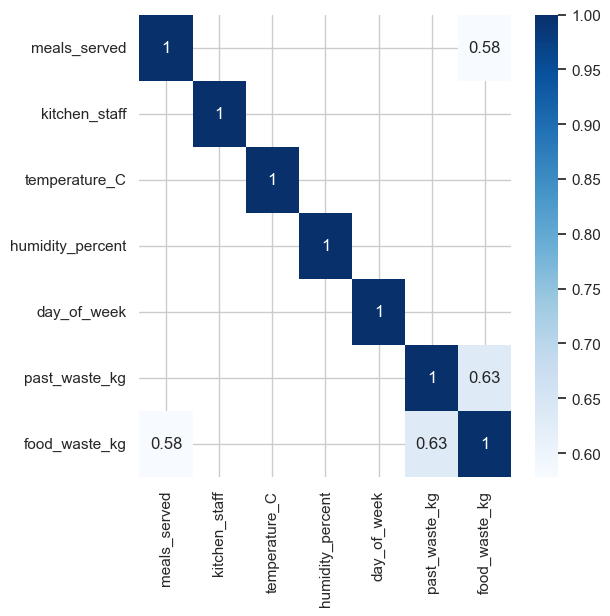

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = data.corr(numeric_only=True)
mask = (corr<0.25)&(corr>-0.25)

plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True, cmap="Blues", mask=mask)
plt.show()